In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
import keras.backend as K

Using TensorFlow backend.


In [2]:
train_da, test_da = mnist.load_data()
x_train, y_train = train_da 
x_test, y_test = test_da

5 0 4 1
9 2 1 3
1 4 3 5
3 6 1 7


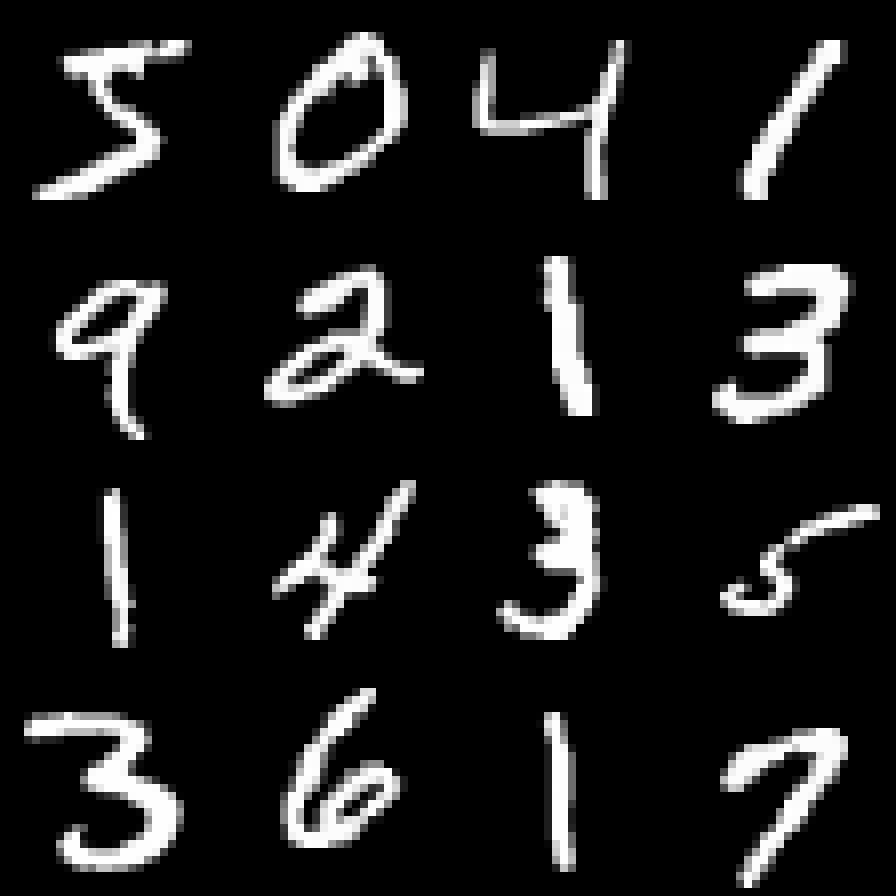

In [3]:
from IPython.display import Image
from PIL import Image
import numpy as np
a = np.concatenate(x_train[0:4], axis=1)
print(" ".join([str(x) for x in y_train[0:4]]))
for i in range(3):
    a = np.concatenate([a, np.concatenate(x_train[4+i*4:8+i*4], axis=1)], axis=0)
    print(" ".join([str(x) for x in y_train[4+i*4:8+i*4]]))
img = Image.fromarray(a, 'L')
img.resize((896, 896), Image.NEAREST)

In [4]:
data_format = K.image_data_format()
rows, cols = 28, 28
num_classes = 10
train_size = x_train.shape[0]
test_size = x_test.shape[0]

if data_format == 'channels_first':
    x_train = x_train.reshape(train_size, 1, rows, cols)
    x_test = x_test.reshape(test_size, 1, rows, cols)
    input_shape = (1, rows, cols)
else:
    x_train = x_train.reshape(train_size, rows, cols, 1)
    x_test = x_test.reshape(test_size, rows, cols, 1)
    input_shape = (rows, cols, 1)
    
# norm data to float in range 0..1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# convert class vectors to one hot vector
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [5]:
x_train = x_train[:100]
y_train = y_train[:100]

In [6]:
model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
None


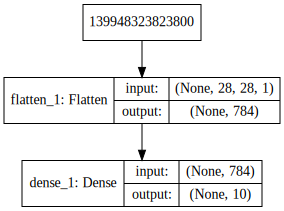

In [7]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [8]:
model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

In [9]:
batch_size = 128
epochs = 20

In [10]:
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test)
)

Instructions for updating:
Use tf.cast instead.
Train on 100 samples, validate on 10000 samples
Epoch 1/20
100/100 [==============================] - 0s 1ms/step - loss: 2.3515 - acc: 0.0600 - val_loss: 2.3473 - val_acc: 0.0720
Epoch 2/20
100/100 [==============================] - 0s 326us/step - loss: 2.2814 - acc: 0.1000 - val_loss: 2.3072 - val_acc: 0.0933
Epoch 3/20
100/100 [==============================] - 0s 355us/step - loss: 2.2141 - acc: 0.1600 - val_loss: 2.2692 - val_acc: 0.1174
Epoch 4/20
100/100 [==============================] - 0s 426us/step - loss: 2.1493 - acc: 0.1900 - val_loss: 2.2332 - val_acc: 0.1373
Epoch 5/20
100/100 [==============================] - 0s 490us/step - loss: 2.0870 - acc: 0.2300 - val_loss: 2.1990 - val_acc: 0.1569
Epoch 6/20
100/100 [==============================] - 0s 521us/step - loss: 2.0271 - acc: 0.2400 - val_loss: 2.1663 - val_acc: 0.1778
Epoch 7/20
100/100 [==============================] - 0s 433us/step - loss: 1.9694 - acc: 0.2900 - val

In [11]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.7862031127929687
Test accuracy: 0.486


In [12]:
from pandas import DataFrame
df_loss = DataFrame(data={
    'Epoche': history.epoch * 2,
    'Legende': ['Loss auf Trainingsdaten'] * len(history.epoch) + ['Loss auf Testdaten'] * len(history.epoch),
    'Loss': history.history['loss'] + history.history['val_loss']
})
df_accuracy = DataFrame(data={
    'Epoche': history.epoch * 2,
    'Legende': ['Accuracy auf Trainingsdaten'] * len(history.epoch) + ['Accuracy auf Testdaten'] * len(history.epoch),
    'Accuracy': history.history['acc'] + history.history['val_acc']
})
print(df_loss)
print(df_accuracy)

    Epoche                  Legende      Loss
0        0  Loss auf Trainingsdaten  2.351537
1        1  Loss auf Trainingsdaten  2.281437
2        2  Loss auf Trainingsdaten  2.214054
3        3  Loss auf Trainingsdaten  2.149289
4        4  Loss auf Trainingsdaten  2.087018
5        5  Loss auf Trainingsdaten  2.027094
6        6  Loss auf Trainingsdaten  1.969358
7        7  Loss auf Trainingsdaten  1.913643
8        8  Loss auf Trainingsdaten  1.859793
9        9  Loss auf Trainingsdaten  1.807665
10      10  Loss auf Trainingsdaten  1.757137
11      11  Loss auf Trainingsdaten  1.708108
12      12  Loss auf Trainingsdaten  1.660497
13      13  Loss auf Trainingsdaten  1.614244
14      14  Loss auf Trainingsdaten  1.569303
15      15  Loss auf Trainingsdaten  1.525644
16      16  Loss auf Trainingsdaten  1.483243
17      17  Loss auf Trainingsdaten  1.442084
18      18  Loss auf Trainingsdaten  1.402152
19      19  Loss auf Trainingsdaten  1.363433
20       0       Loss auf Testdate

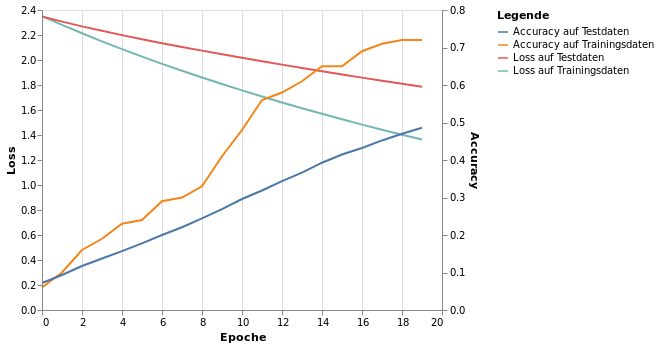

In [13]:
import altair as alt
alt.renderers.enable('notebook')

chart_loss = alt.Chart(df_loss).mark_line().encode(
    x='Epoche', y='Loss', color='Legende')
chart_accuracy = alt.Chart(df_accuracy).mark_line().encode(
    x='Epoche', y='Accuracy', color='Legende')
chart = chart_loss + chart_accuracy
chart.resolve_scale(y='independent')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2010      
Total params: 159,010
Trainable params: 159,010
Non-trainable params: 0
_________________________________________________________________
None


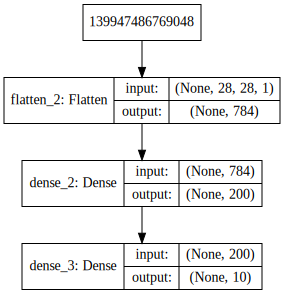

In [14]:
model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(200, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [15]:
model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test)
)

Train on 100 samples, validate on 10000 samples
Epoch 1/20
100/100 [==============================] - 0s 2ms/step - loss: 2.3888 - acc: 0.1200 - val_loss: 2.2913 - val_acc: 0.1717
Epoch 2/20
100/100 [==============================] - 0s 668us/step - loss: 2.1360 - acc: 0.3200 - val_loss: 2.1640 - val_acc: 0.2299
Epoch 3/20
100/100 [==============================] - 0s 644us/step - loss: 1.9163 - acc: 0.4500 - val_loss: 2.0504 - val_acc: 0.3127
Epoch 4/20
100/100 [==============================] - 0s 751us/step - loss: 1.7197 - acc: 0.5600 - val_loss: 1.9466 - val_acc: 0.4171
Epoch 5/20
100/100 [==============================] - 0s 907us/step - loss: 1.5435 - acc: 0.6800 - val_loss: 1.8498 - val_acc: 0.4856
Epoch 6/20
100/100 [==============================] - 0s 722us/step - loss: 1.3823 - acc: 0.7400 - val_loss: 1.7588 - val_acc: 0.5305
Epoch 7/20
100/100 [==============================] - 0s 729us/step - loss: 1.2348 - acc: 0.8200 - val_loss: 1.6738 - val_acc: 0.5640
Epoch 8/20
100/1

In [16]:
def evaluate(model, history):
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    
    df_loss = DataFrame(data={
        'Epoche': history.epoch * 2,
        'Legende': ['Loss auf Trainingsdaten'] * len(history.epoch) + ['Loss auf Testdaten'] * len(history.epoch),
        'Loss': history.history['loss'] + history.history['val_loss']
    })
    df_accuracy = DataFrame(data={
        'Epoche': history.epoch * 2,
        'Legende': ['Accuracy auf Trainingsdaten'] * len(history.epoch) + ['Accuracy auf Testdaten'] * len(history.epoch),
        'Accuracy': history.history['acc'] + history.history['val_acc']
    })
    chart_loss = alt.Chart(df_loss).mark_line().encode(
        x='Epoche', y='Loss', color='Legende')
    chart_accuracy = alt.Chart(df_accuracy).mark_line().encode(
        x='Epoche', y='Accuracy', color='Legende')
    chart = chart_loss + chart_accuracy
    return chart.resolve_scale(y='independent')

Test loss: 1.1378185735702515
Test accuracy: 0.6638


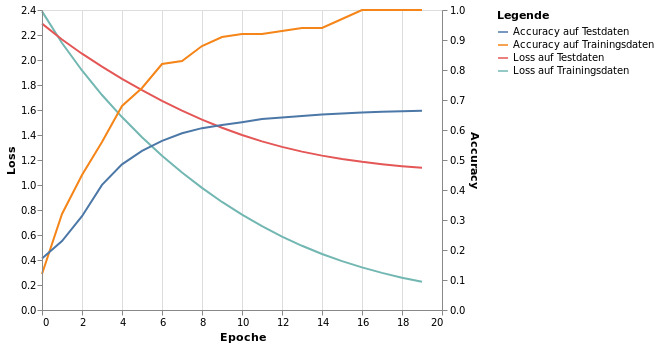

In [17]:
evaluate(model, history)

In [18]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

train_size = x_train.shape[0]
test_size = x_test.shape[0]

data_format = K.image_data_format()
if data_format == 'channels_first':
    x_train = x_train.reshape(train_size, 1, rows, cols)
    x_test = x_test.reshape(test_size, 1, rows, cols)
    input_shape = (1, rows, cols)
else:
    x_train = x_train.reshape(train_size, rows, cols, 1)
    x_test = x_test.reshape(test_size, rows, cols, 1)
    input_shape = (rows, cols, 1)
    
# norm data to float in range 0..1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# convert class vectors to one hot vector
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 200)               157000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2010      
Total params: 159,010
Trainable params: 159,010
Non-trainable params: 0
_________________________________________________________________
None


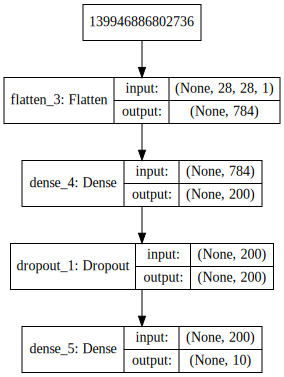

In [19]:
model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(200, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [20]:
batch_size = 128
epochs = 12

model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test)
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 2s 29us/step - loss: 0.4355 - acc: 0.8728 - val_loss: 0.1907 - val_acc: 0.9456
Epoch 2/12
60000/60000 [==============================] - 2s 26us/step - loss: 0.2209 - acc: 0.9359 - val_loss: 0.1397 - val_acc: 0.9586
Epoch 3/12
60000/60000 [==============================] - 2s 26us/step - loss: 0.1741 - acc: 0.9482 - val_loss: 0.1113 - val_acc: 0.9678
Epoch 4/12
60000/60000 [==============================] - 2s 26us/step - loss: 0.1459 - acc: 0.9567 - val_loss: 0.0950 - val_acc: 0.9705
Epoch 5/12
60000/60000 [==============================] - 2s 26us/step - loss: 0.1291 - acc: 0.9619 - val_loss: 0.0883 - val_acc: 0.9726
Epoch 6/12
60000/60000 [==============================] - 2s 26us/step - loss: 0.1176 - acc: 0.9646 - val_loss: 0.0853 - val_acc: 0.9730
Epoch 7/12
60000/60000 [==============================] - 2s 29us/step - loss: 0.1058 - acc: 0.9679 - val_loss: 0.0805 - val_acc

Test loss: 0.07201278391538654
Test accuracy: 0.9786


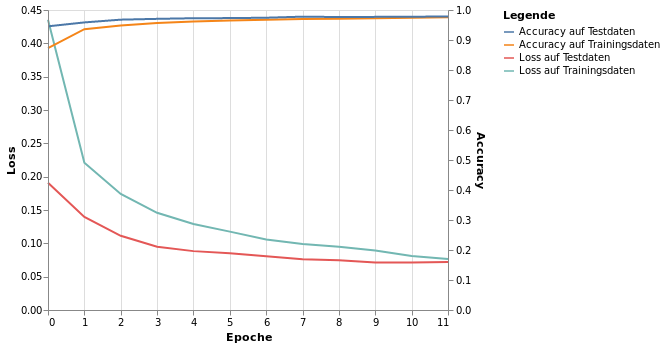

In [21]:
evaluate(model, history)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 200)               1843400   
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)               0         
__________

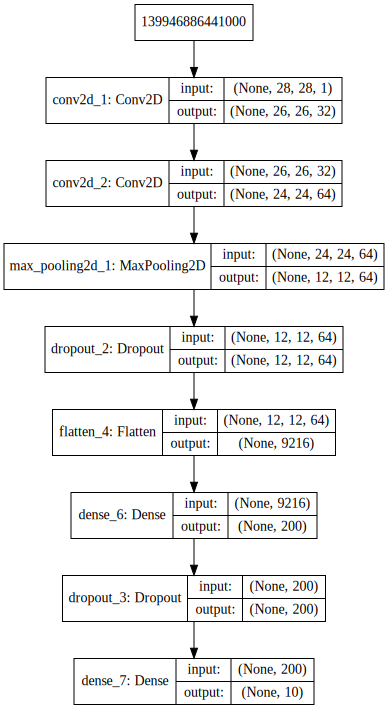

In [22]:
model = Sequential()
model.add(Conv2D(
             32, kernel_size=(3, 3), 
             activation='relu', 
             input_shape=input_shape))
model.add(Conv2D(
             64, kernel_size=(3, 3), 
             activation='relu'))
model.add(MaxPooling2D(
             pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

![Struktur des Convolutional Network](Convnet.svg)

In [23]:
batch_size = 128
epochs = 12

model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test)
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 78s 1ms/step - loss: 0.1907 - acc: 0.9411 - val_loss: 0.0490 - val_acc: 0.9838
Epoch 2/12
60000/60000 [==============================] - 79s 1ms/step - loss: 0.0681 - acc: 0.9791 - val_loss: 0.0367 - val_acc: 0.9867
Epoch 3/12
60000/60000 [==============================] - 76s 1ms/step - loss: 0.0511 - acc: 0.9842 - val_loss: 0.0324 - val_acc: 0.9892
Epoch 4/12
60000/60000 [==============================] - 77s 1ms/step - loss: 0.0394 - acc: 0.9873 - val_loss: 0.0283 - val_acc: 0.9905
Epoch 5/12
60000/60000 [==============================] - 77s 1ms/step - loss: 0.0348 - acc: 0.9889 - val_loss: 0.0278 - val_acc: 0.9912
Epoch 6/12
60000/60000 [==============================] - 79s 1ms/step - loss: 0.0292 - acc: 0.9907 - val_loss: 0.0293 - val_acc: 0.9909
Epoch 7/12
60000/60000 [==============================] - 77s 1ms/step - loss: 0.0266 - acc: 0.9910 - val_loss: 0.0322 - val_acc

Test loss: 0.02862285614894331
Test accuracy: 0.993


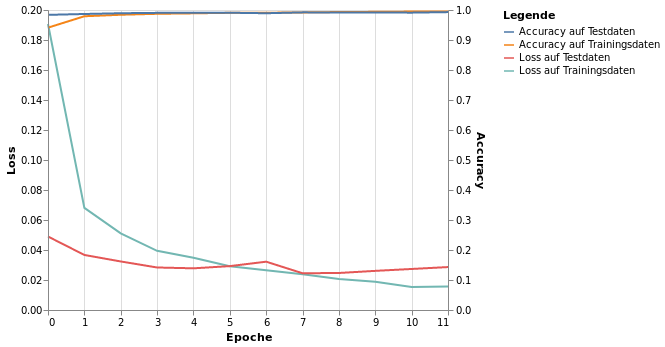

In [24]:
evaluate(model, history)

Schöne 3D-Visualisierung eines Convolutional Networks für MNIST: http://scs.ryerson.ca/~aharley/vis/conv/